In [8]:
import numpy as np
import pandas as pd

# pd.set_option('display.height', 1000)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("max_colwidth", None)
from IPython.core.display import HTML, display

display(HTML("<style>.container { width:100% !important; }</style>"))


def df_stats(df):
    from tabulate import tabulate

    while True:
        print("\n***** Shape: ", df.shape, " *****\n")

        columns_list = df.columns.values.tolist()
        isnull_list = df.isnull().sum().values.tolist()
        isunique_list = df.nunique().values.tolist()
        dtypes_list = df.dtypes.tolist()

        list_stat_val = list(zip(columns_list, isnull_list, isunique_list, dtypes_list))
        df_stat_val = pd.DataFrame(list_stat_val, columns=["Name", "Null", "Unique", "Dtypes"])
        print(tabulate(df_stat_val, headers="keys", tablefmt="psql"))
    return df.head()

/tmp/ipykernel_579859/441343652.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


In [2]:
# Load the specified CSV file
csv_file_path = "/media/data1/ravram/DeepCORO/processed_dataframes/ObjectRecon_SWIN3D_2016-2024_inference_predictions_with_df_metadata_and_report.csv"
df_predictions = pd.read_csv(csv_file_path)
# Load the stent predictions CSV file
stent_csv_path = "/media/data1/datasets/DeepCoro/csv_database/stent_contrast_main_structure_dominance_2016-2024_predictions.csv"
df_stent = pd.read_csv(stent_csv_path)


/tmp/ipykernel_579859/1222033130.py:3: DtypeWarning: Columns (4,5,10,17,22,26,32,33,35,36,37,40,41,43,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,241,242,244,245,246,249,250,251,254,255,256,257,258,266,267,269,270,272,274,275,278,279,280,284,288,289,290,294,298,299,300,301,303,306,309,312,315,316,317,318,319,320,323,324,325,327,328,329,333,345,346,347,350,351,352,354,355,356,357,358,359,360,362,365,367,373,376,377,378,379,381,384,385,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,408,409,410,411,412,413,414,415,416,417,418,419) have mixed types. Specify dtype option on import or set low_memory=False.
  df_predictions = pd.read_csv(csv_file_path)


In [9]:
display(df_stent.head(n=1))
print(f"Length of df_predictions: {len(df_predictions)}")
print(f"Length of df_stent: {len(df_stent)}")
# Map main structure class labels
main_structure_map = {
    0: "Left Coronary",
    1: "Right Coronary", 
    2: "Other",
    3: "Graft",
    4: "Catheter",
    5: "Femoral",
    6: "LV",
    7: "TAVR",
    8: "Aorta",
    9: "Radial",
    10: "TEE probe",
    11: "Pigtail"
}

# Map dominance class labels 
dominance_map = {
    0: "right_dominant",
    1: "left_dominant"
}

# Add mapped labels to dataframe
df_stent['main_structure_name'] = df_stent['main_structure_class'].map(main_structure_map)
df_stent['dominance_name'] = df_stent['dominance_class'].map(dominance_map)


# Merge datasets
df_merged = pd.merge(df_predictions, df_stent, left_on='FileName', right_on='filename', how='inner')
print(f"Length after merge: {len(df_merged)}")

display(df_merged.head(n=1))

# Sort by StudyInstanceUID and SeriesTime
df_merged = df_merged.sort_values(['StudyInstanceUID', 'SeriesTime'])


,Unnamed: 0,filename,pred_contrast_agent,contrast_agent_class,pred_main_structure,main_structure_class,pred_stent_presence,stent_presence_class,pred_dominance,dominance_class,main_structure_name,dominance_name
0,0,/media/data1/ravram/MHI_CATH_DICOM_VIDEOS/2022/2.16.124.113611.1.118.1.1.5994023_1.3.12.2.1107.5.4.5.135214.30000022010107492025500000000.dcm.avi,[1.],1,[8.7834984e-08 9.9999678e-01 4.0818803e-11 8.0909706e-07 7.1402565e-07\n 2.2637270e-09 5.6816009e-07 5.1801761e-11 1.0128549e-06 4.9727483e-10\n 2.1253055e-13 4.4830688e-11],1,[0.0001015],0,[1.6e-06],0,Right Coronary,right_dominant


Length of df_predictions: 1051259
Length of df_stent: 1051259
Length after merge: 1064511


,Unnamed: 0.1,Unnamed: 0_x,object_value_yhat,object_value,ManufacturerModelName,sex,FPS,NumberOfFrames,date,StudyTime,SeriesTime,PatientBirthDate,PhotometricInterpretation,StudyInstanceUID,SeriesInstanceUID,DICOMPath,FileName,uint16_video,primary_angle,secondary_angle,Columns,Rows,pixel_spacing,DistanceSourceToDetector,DistanceSourceToPatient,EstimatedRadiographicMagnificationFactor,TableMotion,RadiationSetting,ImagerPixelSpacing,Split,CathReport_MRN,EXAMEN_ID,Num Accession,date/heure,Modality,Patient_ID,QueryRetrieveLevel,DATEEXAMEN,year,SOPInstanceUID,Recommendation,Conclusion,FrameTime,SeriesDescription,External_Exam,angle_value,coronary_dominance_logit,coronary_dominance,D2_stenosis,D3_stenosis,RVG1_stenosis,RVG2_stenosis,S1_stenosis,bx_stenosis,diagonal_stenosis,dist_lad_stenosis,dist_lcx_stenosis,dist_rca_stenosis,lad_stenosis,lcx_stenosis,leftmain_stenosis,lima_or_svg_stenosis,lvp_stenosis,marg_d_stenosis,mid_lad_stenosis,mid_rca_stenosis,om1_stenosis,om2_stenosis,om3_stenosis,pda_stenosis,posterolateral_stenosis,prox_rca_stenosis,D2_IFRHYPEREMIE,D3_IFRHYPEREMIE,RVG1_IFRHYPEREMIE,RVG2_IFRHYPEREMIE,S1_IFRHYPEREMIE,bx_IFRHYPEREMIE,diagonal_IFRHYPEREMIE,dist_lad_IFRHYPEREMIE,dist_lcx_IFRHYPEREMIE,dist_rca_IFRHYPEREMIE,lad_IFRHYPEREMIE,lcx_IFRHYPEREMIE,leftmain_IFRHYPEREMIE,lima_or_svg_IFRHYPEREMIE,lvp_IFRHYPEREMIE,marg_d_IFRHYPEREMIE,mid_lad_IFRHYPEREMIE,mid_rca_IFRHYPEREMIE,om1_IFRHYPEREMIE,om2_IFRHYPEREMIE,om3_IFRHYPEREMIE,pda_IFRHYPEREMIE,posterolateral_IFRHYPEREMIE,prox_rca_IFRHYPEREMIE,D2_calcif,D3_calcif,RVG1_calcif,RVG2_calcif,S1_calcif,bx_calcif,diagonal_calcif,dist_lad_calcif,dist_lcx_calcif,dist_rca_calcif,lad_calcif,lcx_calcif,leftmain_calcif,lima_or_svg_calcif,lvp_calcif,marg_d_calcif,mid_lad_calcif,mid_rca_calcif,om1_calcif,om2_calcif,om3_calcif,pda_calcif,posterolateral_calcif,prox_rca_calcif,D2_IFRBASAL,D3_IFRBASAL,RVG1_IFRBASAL,RVG2_IFRBASAL,S1_IFRBASAL,bx_IFRBASAL,diagonal_IFRBASAL,dist_lad_IFRBASAL,dist_lcx_IFRBASAL,dist_rca_IFRBASAL,lad_IFRBASAL,lcx_IFRBASAL,leftmain_IFRBASAL,lima_or_svg_IFRBASAL,lvp_IFRBASAL,marg_d_IFRBASAL,mid_lad_IFRBASAL,mid_rca_IFRBASAL,om1_IFRBASAL,om2_IFRBASAL,om3_IFRBASAL,pda_IFRBASAL,posterolateral_IFRBASAL,prox_rca_IFRBASAL,D2_CFRBASAL,D3_CFRBASAL,RVG1_CFRBASAL,RVG2_CFRBASAL,S1_CFRBASAL,bx_CFRBASAL,diagonal_CFRBASAL,dist_lad_CFRBASAL,dist_lcx_CFRBASAL,dist_rca_CFRBASAL,lad_CFRBASAL,lcx_CFRBASAL,leftmain_CFRBASAL,lima_or_svg_CFRBASAL,lvp_CFRBASAL,marg_d_CFRBASAL,mid_lad_CFRBASAL,mid_rca_CFRBASAL,om1_CFRBASAL,om2_CFRBASAL,om3_CFRBASAL,pda_CFRBASAL,posterolateral_CFRBASAL,prox_rca_CFRBASAL,D2_CFRHYPEREMIE,D3_CFRHYPEREMIE,RVG1_CFRHYPEREMIE,RVG2_CFRHYPEREMIE,S1_CFRHYPEREMIE,bx_CFRHYPEREMIE,diagonal_CFRHYPEREMIE,dist_lad_CFRHYPEREMIE,dist_lcx_CFRHYPEREMIE,dist_rca_CFRHYPEREMIE,lad_CFRHYPEREMIE,lcx_CFRHYPEREMIE,leftmain_CFRHYPEREMIE,lima_or_svg_CFRHYPEREMIE,lvp_CFRHYPEREMIE,marg_d_CFRHYPEREMIE,mid_lad_CFRHYPEREMIE,mid_rca_CFRHYPEREMIE,om1_CFRHYPEREMIE,om2_CFRHYPEREMIE,om3_CFRHYPEREMIE,pda_CFRHYPEREMIE,posterolateral_CFRHYPEREMIE,prox_rca_CFRHYPEREMIE,D2_FFRHYPEREMIE,D3_FFRHYPEREMIE,RVG1_FFRHYPEREMIE,RVG2_FFRHYPEREMIE,S1_FFRHYPEREMIE,bx_FFRHYPEREMIE,diagonal_FFRHYPEREMIE,dist_lad_FFRHYPEREMIE,dist_lcx_FFRHYPEREMIE,dist_rca_FFRHYPEREMIE,lad_FFRHYPEREMIE,lcx_FFRHYPEREMIE,leftmain_FFRHYPEREMIE,lima_or_svg_FFRHYPEREMIE,lvp_FFRHYPEREMIE,marg_d_FFRHYPEREMIE,mid_lad_FFRHYPEREMIE,mid_rca_FFRHYPEREMIE,om1_FFRHYPEREMIE,om2_FFRHYPEREMIE,om3_FFRHYPEREMIE,pda_FFRHYPEREMIE,posterolateral_FFRHYPEREMIE,prox_rca_FFRHYPEREMIE,D2_FFRBASAL,D3_FFRBASAL,RVG1_FFRBASAL,RVG2_FFRBASAL,S1_FFRBASAL,bx_FFRBASAL,diagonal_FFRBASAL,dist_lad_FFRBASAL,dist_lcx_FFRBASAL,dist_rca_FFRBASAL,lad_FFRBASAL,lcx_FFRBASAL,leftmain_FFRBASAL,lima_or_svg_FFRBASAL,lvp_FFRBASAL,marg_d_FFRBASAL,mid_lad_FFRBASAL,mid_rca_FFRBASAL,om1_FFRBASAL,om2_FFRBASAL,om3_FFRBASAL,pda_FFRBASAL,posterolateral_FFRBASAL,prox_rca_FFRBASAL,acute_coronary_occlusion,pci_regions,PONTAGES,acute_inferior_mi,TITREEXAMEN,Indications,ACS,insuffisance_cardiaque,c

In [10]:
import numpy as np
import pandas as pd

# ── 1. Ensure the column exists up front ────────────────────────────────────────
df_merged["status"] = "unknown"          # will be overwritten below

# ── 2. Convenience flags ────────────────────────────────────────────────────────
df_merged["is_pci"] = df_merged["stent_presence_class"].eq(1)

# cumulative “has PCI already been seen *earlier* in this study AND artery?”
group_cols = ["StudyInstanceUID", "main_structure_name"]
df_merged["pci_seen_before"] = (
    df_merged
    .groupby(group_cols, sort=False)["is_pci"]
    .cumsum()            # running total …
    .shift(fill_value=0) # … but *before* the current row
    .astype(bool)
)

# ── 3. Build the three mutually-exclusive conditions ───────────────────────────
cond_pci        = df_merged["is_pci"]
cond_post_pci   = (~cond_pci
                   & df_merged["pci_seen_before"]
                   & df_merged["contrast_agent_class"].eq(1))

cond_diagnostic = ~cond_pci & ~df_merged["pci_seen_before"]

# ── 4. Final assignment (vectorised) ───────────────────────────────────────────
df_merged.loc[cond_pci,        "status"] = "PCI"
df_merged.loc[cond_post_pci,   "status"] = "POST_PCI"
df_merged.loc[cond_diagnostic, "status"] = "diagnostic"

# ── 5. (Optional) tidy-up helper columns ───────────────────────────────────────
df_merged.drop(columns=["is_pci", "pci_seen_before"], inplace=True)

# quick check
print(df_merged["status"].value_counts())

status
diagnostic    461426
PCI           408715
POST_PCI      136239
unknown        58131
Name: count, dtype: int64


In [12]:
import sys, os
import numpy as np
import pandas as pd   # assuming df_merged is a DataFrame
from pathlib import Path

# ------------------------------------------------------------------ paths / imports
dir2 = Path("/volume/DicomVideoProcessing/downloadAvi").resolve()
dir1 = dir2.parent
if str(dir1) not in sys.path:
    sys.path.append(str(dir1))

from downloadAvi import plot_avi   # noqa: E402

# ------------------------------------------------------------------ parameters
ID_COL       = "StudyInstanceUID"  # change if different
PHASE_COL    = "status"             # e.g. 'ED' | 'ES' | 'LA'  (edit to match your column name)
REQUIRED_SET = None                # None → require ≥3 distinct phases;  otherwise set({'ED','ES','LA'})
LABEL_COL    = "status"            # column already used in your sample_by_status
N_PER_LABEL  = 9                   # ≤9 rows per label



def sample_by_status(df: pd.DataFrame,
                     label_col: str = LABEL_COL,
                     n: int = N_PER_LABEL) -> dict[str, pd.DataFrame]:
    """
    Return {label: sampled_dataframe}; at most `n` rows per label.
    """
    out = {}
    for label, sub in df.groupby(label_col):
        out[label] = sub.sample(n=min(n, len(sub)),
                                replace=False,
                                random_state=42)
    return out



samples = sample_by_status(df_merged,
                           label_col=LABEL_COL,
                           n=N_PER_LABEL)

for label, sample_df in samples.items():
    print(f"\n▶ Plotting {len(sample_df)} “{label}” videos "
          f"(all rows have ≥3 phases per study)")
    
    plot_avi.sample_and_plot_middle_frames(
        sample_df,
        N=len(sample_df),          # one subplot per clip
        label_column=LABEL_COL,    # shows status on figure
        path_column="FileName"     # or whatever column stores the AVI path
    )

ModuleNotFoundError: No module named 'zarr'

100%|██████████| 225807/225807 [00:26<00:00, 8562.81it/s] 



▶ Plotting 9 “diagnostic” videos (diagnostic, contrast+, Right Coronary)


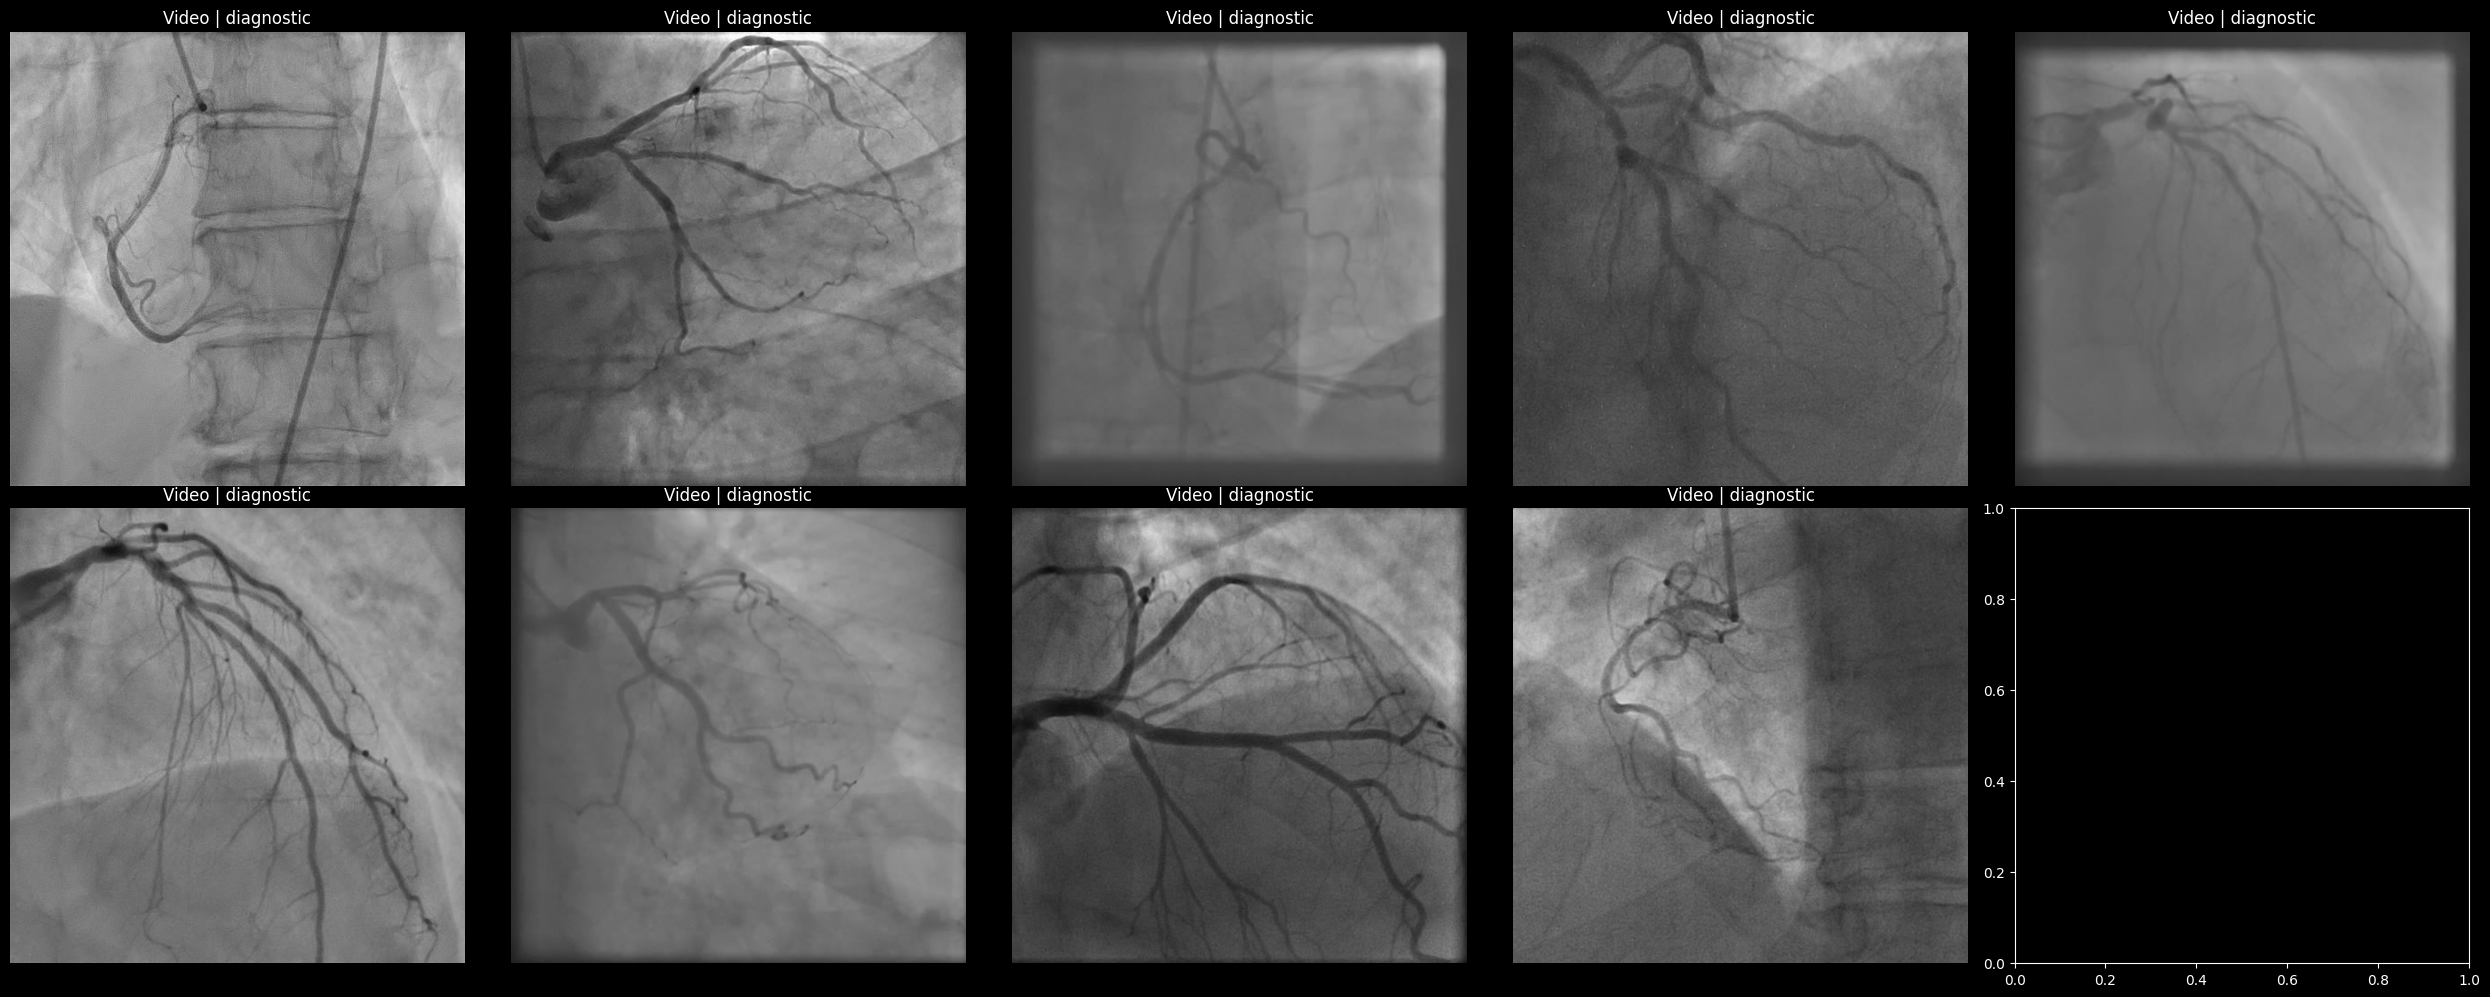

In [15]:
import sys, os
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm import tqdm

tqdm.pandas()

# ──────────────────────────────────────────────────────────────────────────
# 0)  Paths / external helpers
# ──────────────────────────────────────────────────────────────────────────
ROOT_AVI = Path("/volume/DicomVideoProcessing/downloadAvi").resolve()
if str(ROOT_AVI.parent) not in sys.path:
    sys.path.append(str(ROOT_AVI.parent))

from downloadAvi import plot_avi   # noqa: E402


# ──────────────────────────────────────────────────────────────────────────
# 1)  Merge predictions  ×  stent metadata
# ──────────────────────────────────────────────────────────────────────────
main_structure_map = {
    0: "Left Coronary",
    1: "Right Coronary",
    2: "Other", 3: "Graft", 4: "Catheter", 5: "Femoral",
    6: "LV", 7: "TAVR", 8: "Aorta", 9: "Radial",
    10: "TEE probe", 11: "Pigtail"
}
dominance_map = {0: "right_dominant", 1: "left_dominant"}


# ──────────────────────────────────────────────────────────────────────────
# 2)  Hard filters requested by the user
#     – status == 'diagnostic'
#     – main_structure_name ∈ {'Left Coronary', 'Right Coronary'}
#     – contrast_agent_class == 1
# ──────────────────────────────────────────────────────────────────────────
df_merged = df_merged.loc[
    (df_merged["status"] == "diagnostic") &
    (df_merged["main_structure_name"].isin({"Left Coronary", "Right Coronary"})) &
    (df_merged["contrast_agent_class"] == 1)
].copy()

# ──────────────────────────────────────────────────────────────────────────
# 4)  Tiny helpers for linguistic formatting
# ──────────────────────────────────────────────────────────────────────────
def format_stenosis_value(p: float) -> str:
    if p == 0:               return "no significant stenosis"
    if p < 50:               return f"mild stenosis (~{p}%)"
    if p < 70:               return f"moderate stenosis (~{p}%)"
    if p < 90:               return f"severe stenosis (~{p}%)"
    return f"critical stenosis (~{p}%)"

def format_calcification_value(c: str) -> str:
    txt = c.lower()
    if "no calcification" in txt or "pas de calcification" in txt:
        return "no calcifications"
    if any(k in txt for k in ("minimes", "mild")):      return "minimal calcifications"
    if any(k in txt for k in ("modérées", "moderate")): return "moderate calcifications"
    if any(k in txt for k in ("importantes", "severe")):return "severe calcifications"
    return f"calcifications: '{c}'"

def format_ifr_value(v: float) -> str:
    return f"IFR {'normal' if v > 0.89 else 'abnormal'} (~{v:.2f})"

# ──────────────────────────────────────────────────────────────────────────
# 5)  Report-builder (uses `dominance_name` + `main_structure_name`)
# ──────────────────────────────────────────────────────────────────────────
labels_to_vessel_names = {
    "leftmain_stenosis":        "the Left Main Coronary Artery (LMCA)",
    "lad_stenosis":             "the proximal LAD",
    "mid_lad_stenosis":         "the mid LAD",
    "dist_lad_stenosis":        "the distal LAD",
    "diagonal_stenosis":        "D1 branch",
    "D2_stenosis":              "D2 branch",
    "lcx_stenosis":             "the proximal LCX",
    "dist_lcx_stenosis":        "the distal LCX",
    "om1_stenosis":             "OM1",
    "om2_stenosis":             "OM2",
    "prox_rca_stenosis":        "the proximal RCA",
    "mid_rca_stenosis":         "the mid RCA",
    "dist_rca_stenosis":        "the distal RCA",
    "pda_stenosis":             "the PDA",
    "posterolateral_stenosis":  "the posterolateral branch",
    "bx_stenosis":              "Ramus",
    "lvp_stenosis":             "left posterolateral branch",
    "lima_or_svg_stenosis":     "the LIMA or SVG graft",
}

rca_vessels = ["prox_rca_stenosis", "mid_rca_stenosis", "dist_rca_stenosis"]
non_rca_vessels = [
    "leftmain_stenosis", "lad_stenosis", "mid_lad_stenosis", "dist_lad_stenosis",
    "diagonal_stenosis", "D2_stenosis", "lcx_stenosis", "dist_lcx_stenosis",
    "om1_stenosis", "om2_stenosis", "bx_stenosis", "lima_or_svg_stenosis", 
    "lvp_stenosis"
]
right_dominance_dependent_vessels = ["pda_stenosis", "posterolateral_stenosis"]
left_dominance_dependent_vessels = ["pda_stenosis", "lvp_stenosis"]

def create_report(row: pd.Series, coronary_specific_report: bool = True) -> str:
    dom_raw   = str(row.get("dominance_name", "")).replace("_", " ")
    dom_lower = dom_raw.lower()
    has_graft = ("pontage" in str(row.get("Conclusion", "")).lower()) or (row.get("bypass_graft", 0) == 1)

    # → extend RCA/non-RCA sets based on dominance
    if "right" in dom_lower:
        rca_extended     = rca_vessels + right_dominance_dependent_vessels
        non_rca_extended = non_rca_vessels
    else:  # left- or co-dominant
        rca_extended     = rca_vessels
        non_rca_extended = non_rca_vessels + left_dominance_dependent_vessels

    # → choose which vessel list to describe
    if coronary_specific_report:
        side = row.get("main_structure_name")
        if side == "Right Coronary":
            local_order = rca_extended[:]
        elif side == "Left Coronary":
            local_order = non_rca_extended[:]
        else:
            return "Invalid main_structure_name for coronary-specific report"
    else:
        local_order = list(labels_to_vessel_names.keys())

    vessel_dict = labels_to_vessel_names.copy()
    if "left" in dom_lower:
        vessel_dict["pda_stenosis"]            = "the LEFT PDA"
        vessel_dict["posterolateral_stenosis"] = "the LEFT posterolateral branch"

    if not has_graft and "lima_or_svg_stenosis" in local_order:
        local_order.remove("lima_or_svg_stenosis")

    # → assemble sentence(s)
    lines = []
    for stenosis_lbl in local_order:
        prefix = stenosis_lbl.replace("_stenosis", "")
        vname  = vessel_dict[stenosis_lbl]

        desc = []
        st   = row.get(stenosis_lbl, -1)
        if pd.notna(st) and st != -1:
            desc.append(format_stenosis_value(float(st)))

        calc = row.get(prefix + "_calcif", "-1")
        if isinstance(calc, str) and calc.strip() != "-1":
            desc.append(format_calcification_value(calc))

        ifr  = row.get(prefix + "_IFRHYPEREMIE", -1)
        if pd.notna(ifr) and ifr != -1:
            desc.append(format_ifr_value(float(ifr)))

        if desc:
            combined = desc[0] if len(desc) == 1 else ", ".join(desc[:-1]) + ", and " + desc[-1]
            lines.append(f"{vname} has {combined}.")

    if dom_raw.strip():
        lines.append(f"The coronary circulation is {dom_raw}.")

    return "\n".join(lines) if lines else "No significant findings or additional data available."

# ──────────────────────────────────────────────────────────────────────────
# 6)  Generate reports
# ──────────────────────────────────────────────────────────────────────────
df_merged["Report"] = df_merged.progress_apply(
    lambda r: create_report(r, coronary_specific_report=True), axis=1
)

# ──────────────────────────────────────────────────────────────────────────
# 7)  Sampling (≤9 per status)  +  plotting
# ──────────────────────────────────────────────────────────────────────────
def sample_by_status(df: pd.DataFrame, n: int = 9, label_col: str = "status"):
    return {
        lbl: sub.sample(n=min(n, len(sub)), random_state=42, replace=False)
        for lbl, sub in df.groupby(label_col)
    }

samples = sample_by_status(df_merged, n=9)

for lbl, sdf in samples.items():
    print(f"\n▶ Plotting {len(sdf)} “{lbl}” videos (diagnostic, contrast+, {sdf['main_structure_name'].iloc[0]})")
    plot_avi.sample_and_plot_middle_frames(
        sdf,
        N=len(sdf),
        label_column="status",
        path_column="FileName"
    )

In [16]:
# Create bypass_graft column based on whether Conclusion contains "pontage" (case-insensitive)
df_merged['bypass_graft'] = df_merged['Conclusion'].str.contains('pontage', case=False, na=False).astype(int)

In [17]:
# Load the output file with alpha separator
output_sampled_file_path = "data/reports/reports_with_alpha_separator_with_Calcifc_Stenosis_IFR_20250108_RCA_LCA.csv"
df_sampled = pd.read_csv(output_sampled_file_path, sep="α")
display(df_sampled.Split.value_counts())
# Create a mapping dictionary from df_sampled for StudyInstanceUID to Split
study_to_split_map = df_sampled.set_index('StudyInstanceUID')['Split'].to_dict()

# Map the Split values to df_predictions based on StudyInstanceUID
df_merged['Split'] = df_merged['StudyInstanceUID'].map(study_to_split_map)

# Drop rows with missing Split values
df_merged = df_merged.dropna(subset=['Split'])

# Display value counts to verify the mapping
display(df_merged.Split.value_counts())


/tmp/ipykernel_579859/3584476513.py:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df_sampled = pd.read_csv(output_sampled_file_path, sep="α")


Split
TRAIN    53768
TEST     15895
VAL       8082
Name: count, dtype: int64

Split
TRAIN    23458
TEST      6688
VAL       3594
Name: count, dtype: int64

In [ ]:
import os

output_file_path = "data/reports/reports_with_alpha_separator_with_Calcifc_Stenosis_IFR_20250601_RCA_LCA_merged_with_left_dominance_dependent_vessels.csv"
output_dir = os.path.dirname(output_file_path)

# Check if the directory exists, if not create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# Drop rows where 'External_Exam' is True
df_merged = df_merged[df_merged["External_Exam"] != True]
df_merged = df_merged[df_merged["bypass_graft"] != 1]

df_non_nan_reports = df_merged.dropna(subset=["Report"])
# Filter the dataframe to keep only rows where 'object_value' is 5 or 9
df_non_nan_reports = df_non_nan_reports[df_non_nan_reports["object_value"].isin([5, 9])]
# List of stenosis columns to check
stenosis_columns = [
    "diagonal_stenosis","D2_stenosis", "D3_stenosis", "RVG1_stenosis", "RVG2_stenosis", 
    'S1_stenosis', 'bx_stenosis', 'dist_lad_stenosis',
    'dist_lcx_stenosis', 'prox_rca_stenosis', 'dist_rca_stenosis', 'pda_stenosis', 'posterolateral_stenosis', 'lad_stenosis', 'lcx_stenosis',
    'leftmain_stenosis'
]

# Create a boolean DataFrame indicating if each cell is NaN or -1.0
is_na_or_minus_one = df_non_nan_reports[stenosis_columns].isna() | (df_non_nan_reports[stenosis_columns] == -1.0)

# Create a mask for rows where NOT ALL stenosis columns are NaN or -1.0
mask = ~is_na_or_minus_one.all(axis=1)

# Filter the DataFrame to drop rows meeting the unwanted condition
df_non_nan_reports = df_non_nan_reports[mask]
df_non_nan_reports.to_csv(output_file_path, sep="α", index=False, header=True)

In [19]:
def assign_patient_splits(df_final, output_path, train_ratio=0.9, random_state=42):
    """
    Assigns patients to train/val splits and saves the resulting dataframe.
    
    Args:
        df_final (pd.DataFrame): Input dataframe containing patient data
        output_path (str): Path where the output CSV file will be saved
        train_ratio (float): Ratio of patients to assign to training set (default 0.9)
        random_state (int): Random seed for reproducibility (default 42)
        
    Returns:
        pd.DataFrame: Dataframe with train/val splits assigned
    """
    # Split patients into train/val
    unique_patients = df_final["CathReport_MRN"].drop_duplicates()
    train_size = int(train_ratio * len(unique_patients))
    train_patients = unique_patients.sample(n=train_size, random_state=random_state)
    val_patients = unique_patients.drop(train_patients.index)

    # Keep only the sampled patients in the dataframe
    df_sampled = df_final[
        df_final["CathReport_MRN"].isin(train_patients) 
        | df_final["CathReport_MRN"].isin(val_patients)
    ]

    # Assign split based on CathReport_MRN
    df_sampled.loc[df_sampled["CathReport_MRN"].isin(train_patients), "Split"] = "train"
    df_sampled.loc[df_sampled["CathReport_MRN"].isin(val_patients), "Split"] = "val"

    # Save the dataframe
    df_sampled.to_csv(output_path, sep="α", index=False)
    
    display(df_sampled.Split.value_counts())
    return df_sampled

In [ ]:
import pandas as pd
output_sampled_file_path = "data/reports/reports_with_alpha_separator_with_Calcifc_Stenosis_IFR_20250108_RCA_LCA.csv"
df_sampled = pd.read_csv(output_sampled_file_path, sep="α")

display(df_sampled.object_value.value_counts())

In [ ]:
# Sample 30 unique StudyInstanceUIDs
sampled_study_ids = df_sampled["StudyInstanceUID"].unique()
sampled_study_ids = np.random.choice(sampled_study_ids, size=30, replace=False)

# Keep only rows matching the sampled StudyInstanceUIDs
df_sampled = df_sampled[df_sampled["StudyInstanceUID"].isin(sampled_study_ids)]
display(df_sampled.Split.value_counts())
display(df_sampled.StudyInstanceUID.value_counts())
df_sampled.to_csv('data/reports/report_sampled_200.csv', sep='α', index=False)


In [ ]:
import pandas as pd
df_sampled = pd.read_csv('data/reports/report_sampled_200.csv', sep='α')

# Display rows where FileName matches the specified path
target_file = '/media/data1/ravram/MHI_CATH_DICOM_VIDEOS/2024/1.3.12.2.1107.5.4.5.135214.30000024062510374540700010919.512.mp4'
matching_rows = df_sampled[df_sampled['FileName'] == target_file]
# Display Report column for matching StudyInstanceUID
study_id = matching_rows['StudyInstanceUID'].iloc[0]
study_reports = df_sampled[df_sampled['StudyInstanceUID'] == study_id]
display(study_reports[['FileName', 'StudyInstanceUID', 'Report']])


In [ ]:
import sys
import os
import numpy as np
## CHANGE THIS
dir2 = os.path.abspath("/volume/DicomVideoProcessing/downloadAvi")
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path:
    sys.path.append(dir1)

from downloadAvi import plot_avi

# Sample 2-3 random StudyInstanceUIDs
study_ids = df_non_nan_reports.loc[df_non_nan_reports['coronary_dominance_consensus']=='right_dominant']['StudyInstanceUID'].unique()

sampled_studies = np.random.choice(study_ids, size=3, replace=False)

# For each sampled study, plot 8 videos
for study_id in sampled_studies:
    study_videos = df_non_nan_reports[df_non_nan_reports['StudyInstanceUID'] == study_id]
    if len(study_videos) >= 3:
        study_sample = study_videos.sample(n=9, replace=len(study_videos) < 9)
        print(study_sample.FileName.nunique())
        plot_avi.sample_and_plot_middle_frames(study_sample, 9, 
                                             label_column='Report', 
                                             path_column='FileName')
        
        

In [ ]:
# Display number of unique StudyInstanceUID by split and year
print("Number of unique StudyInstanceUID by split:")
print(df_sampled.groupby('Split')['StudyInstanceUID'].nunique())

# Extract year from date column and show breakdown
df_sampled['Year'] = pd.to_datetime(df_sampled['date'], format='%Y%m%d').dt.year
print("\nBreakdown by year:")
print(df_sampled.groupby('Year')['StudyInstanceUID'].nunique())

In [ ]:
output_sampled_file_path = pd.read_csv(
    "data/reports/reports_with_alpha_separator_with_Calcifc_Stenosis_IFR_20250108.csv", sep="α"
)
#df_sampled = output_sampled_file_path.sample(96).reset_index()
# Save the dataframe with split information to a new CSV file
#output_sampled_file_path = "data/reports/reports_sampled_no_conclusion_96.csv"
#df_sampled.to_csv(output_sampled_file_path, sep="α", index=False)

In [ ]:

# For example, view rows with a specific Report value:
output_sampled_file_path[output_sampled_file_path.Report == 'The coronary circulation is right_dominant.'].head(5)

## Example tokenization

In [30]:
df_sampled = pd.read_csv('data/reports/reports_with_alpha_separator_with_Calcifc_Stenosis_IFR_20250601_RCA_LCA_merged_with_left_dominance_dependent_vessels.csv', sep='α')
df_sampled = df_sampled.loc[df_sampled["dominance_name"] == "left_dominant"]

/tmp/ipykernel_579859/1767801863.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df_sampled = pd.read_csv('data/reports/reports_with_alpha_separator_with_Calcifc_Stenosis_IFR_20250601_RCA_LCA_merged_with_left_dominance_dependent_vessels.csv', sep='α')


In [33]:
from transformers import AutoTokenizer, AutoModel

# Load PubMedBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext")

# Get a sample text from the dataframe
sample_text = df_sampled['Report'].iloc[1]
print(sample_text)
# Encode the text
encoded = tokenizer(
    sample_text,
    padding="max_length",
    max_length=512, 
    truncation=True,
    return_tensors="pt"
)

# Decode back to text to verify
decoded = tokenizer.decode(encoded['input_ids'][0], skip_special_tokens=True)


the Left Main Coronary Artery (LMCA) has no significant stenosis.
the proximal LAD has no significant stenosis.
the mid LAD has no significant stenosis.
the distal LAD has no significant stenosis.
D1 branch has no significant stenosis.
D2 branch has no significant stenosis.
the proximal LCX has no significant stenosis.
the distal LCX has no significant stenosis.
OM1 has no significant stenosis.
OM2 has no significant stenosis.
Ramus has no significant stenosis.
left posterolateral branch has no significant stenosis.
the LEFT PDA has no significant stenosis.
left posterolateral branch has no significant stenosis.
The coronary circulation is left dominant.


In [34]:
# Print full texts without truncation
pd.set_option('display.max_colwidth', None)
print("\nOriginal text (full):")
print(sample_text)
print("\nDecoded text (full):")
print(decoded)
print("\nEncoded tokens:")


Original text (full):
the Left Main Coronary Artery (LMCA) has no significant stenosis.
the proximal LAD has no significant stenosis.
the mid LAD has no significant stenosis.
the distal LAD has no significant stenosis.
D1 branch has no significant stenosis.
D2 branch has no significant stenosis.
the proximal LCX has no significant stenosis.
the distal LCX has no significant stenosis.
OM1 has no significant stenosis.
OM2 has no significant stenosis.
Ramus has no significant stenosis.
left posterolateral branch has no significant stenosis.
the LEFT PDA has no significant stenosis.
left posterolateral branch has no significant stenosis.
The coronary circulation is left dominant.

Decoded text (full):
the left main coronary artery ( lmca ) has no significant stenosis. the proximal lad has no significant stenosis. the mid lad has no significant stenosis. the distal lad has no significant stenosis. d1 branch has no significant stenosis. d2 branch has no significant stenosis. the proximal lc